In [1]:
import os
import numpy as np

In [2]:
# Path to the main folder
folder_path = "/kaggle/input/myimagesproperset/new_image_dataset"
# Get the sub-folders
subfolders = ['0', '1']

In [3]:
# Initialize empty lists for X and Y
X = []
Y = []

In [4]:
# Iterate over the sub-folders
for label, subfolder in enumerate(subfolders):
    subfolder_path = os.path.join(folder_path, subfolder)
    
    # Iterate over the files in the sub-folder
    for file_name in os.listdir(subfolder_path):
        image_path = os.path.join(subfolder_path, file_name)
        
        # Append the file name to X and the label to Y
        X.append(image_path)
        Y.append(label)

In [5]:
# Convert X and Y to numpy arrays
X = np.array(X)
Y = np.array(Y)

print(X[0:5])
print(Y[0:5])

['/kaggle/input/myimagesproperset/new_image_dataset/0/4b5ep3.jpg'
 '/kaggle/input/myimagesproperset/new_image_dataset/0/3xrwx5.jpg'
 '/kaggle/input/myimagesproperset/new_image_dataset/0/3uzl9r.jpg'
 '/kaggle/input/myimagesproperset/new_image_dataset/0/2e7acp.jpg'
 '/kaggle/input/myimagesproperset/new_image_dataset/0/5aubcx.jpg']
[0 0 0 0 0]


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

In [7]:
import torch
import torch.nn as nn
import torchvision.models as models

# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 2)
    
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.pool1(out)
        out = self.conv2(out)
        out = self.relu2(out)
        out = self.pool2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.relu3(out)
        out = self.fc2(out)
        return out 

In [8]:
# Modify the CustomDataset class to include image paths
class CustomDataset(Dataset):
    def __init__(self, X, Y, transform=None):
        self.X = X
        self.Y = Y
        self.transform = transform
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        image_path = self.X[index]
        label = self.Y[index]
        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label, image_path  # Return image path as well

In [9]:
# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(device)

cuda


In [10]:
# Define the hyperparameters
num_epochs = 10
batch_size = 128
learning_rate = 0.001

In [11]:
def early_stopping(train_loss, validation_loss, min_delta, tolerance):
    counter = 0
    if (validation_loss - train_loss) > min_delta:
        counter +=1
        if counter >= tolerance:
            return True

In [12]:
# Create the CNN model
model = CNN().to(device)

In [13]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [14]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [15]:
from sklearn.model_selection import train_test_split

# X contains your feature data
# y contains your label data

# Perform train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)



In [16]:
# Create the dataset

dataset = CustomDataset(X_train, y_train, transform=transform)

In [17]:
# Create the dataloader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [18]:
# Training loop
total_step = len(dataloader)
for epoch in range(num_epochs):
    for i, (images, labels, image_path) in enumerate(dataloader):
        images = images.to(device)
        labels = labels.to(device).long()
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # Print the loss after each epoch
    print('Epoch [{}/{}], Loss: {:.4f}'
          .format(epoch+1, num_epochs, loss.item()))
    continue

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [1/10], Loss: 0.5558
Epoch [2/10], Loss: 0.6588
Epoch [3/10], Loss: 0.5347
Epoch [4/10], Loss: 0.5713
Epoch [5/10], Loss: 0.6367
Epoch [6/10], Loss: 0.7145
Epoch [7/10], Loss: 0.6219
Epoch [8/10], Loss: 0.6158
Epoch [9/10], Loss: 0.5468
Epoch [10/10], Loss: 0.3939


In [19]:
# Set the model in evaluation mode
model.eval()

CNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=128, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=128, out_features=2, bias=True)
)

In [20]:
# Variables to keep track of correct predictions and total examples
total_examples = 0
correct_predictions = 0

In [21]:
test_dataset=dataset = CustomDataset(X_test, y_test, transform=transform)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

Testing Accuracy: 62.53%


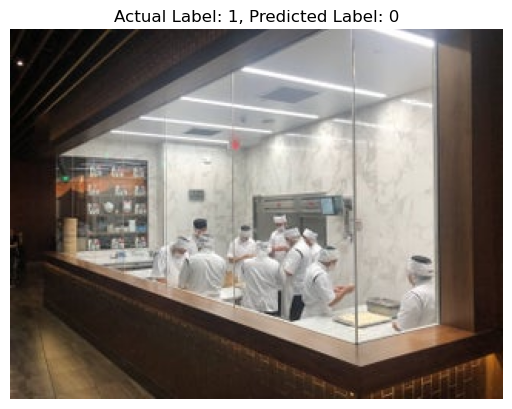

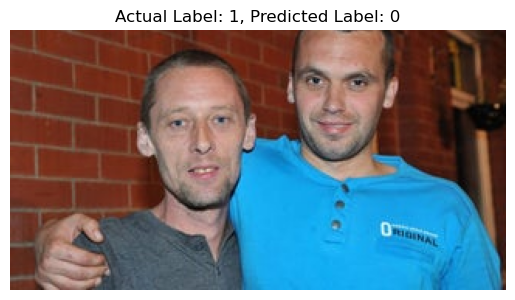

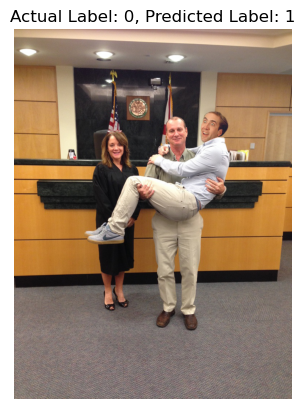

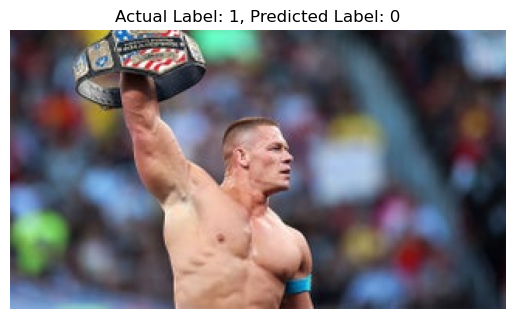

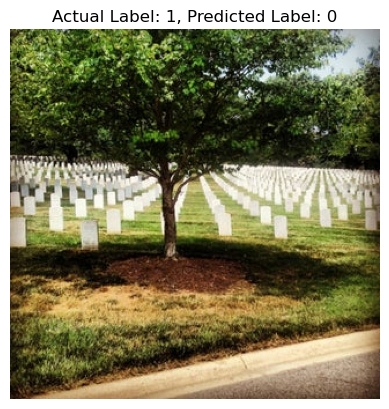

In [22]:
# Testing loop and evaluation
total_examples = 0
correct_predictions = 0
mispredicted_samples = []  # List to store mispredicted samples and their image paths

with torch.no_grad():
    for images, labels, image_paths in test_dataloader:
        images = images.to(device)
        labels = labels.to(device).long()

        # Forward pass
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        total_examples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

        # Collect mispredicted samples
        for i in range(len(predicted)):
            if predicted[i] != labels[i]:
                mispredicted_samples.append((image_paths[i], labels[i].item(), predicted[i].item()))

# Calculate testing accuracy
testing_accuracy = correct_predictions / total_examples
print("Testing Accuracy: {:.2f}%".format(testing_accuracy * 100))


# Sample and display some mispredicted samples
import matplotlib.pyplot as plt

def show_image(image_path, actual_label, predicted_label):
    image = Image.open(image_path).convert("RGB")
    plt.imshow(image)
    plt.title(f"Actual Label: {actual_label}, Predicted Label: {predicted_label}")
    plt.axis('off')
    plt.show()

# Display the first few mispredicted samples (you can adjust the number)
num_mispredicted_samples_to_display = 5

for i in range(min(num_mispredicted_samples_to_display, len(mispredicted_samples))):
    image_path, actual_label, predicted_label = mispredicted_samples[i]
    show_image(image_path, actual_label, predicted_label)